# Data de entrega (limite, final): 02/08

# Mas, preferencialmente, dia 26/07, pra dar tempo de descansar

_________

# Projeto Módulo 4 - Renda Familiar

_____

A Autoridade De Estatística das Filipinas (PSA) lidera a realização da Pesquisa de Renda e Despesa Familiar (FIES) em todo o país. A pesquisa, realizada a cada 3 (três) anos, tem como objetivo fornecer dados sobre renda e despesas familiares, incluindo, entre outros, níveis de consumo por item de despesa, fontes de renda em dinheiro e informações relacionadas que afetam a renda e níveis de despesas e padrões nas Filipinas. Dessa forma, pede-se que seja elaborado um relatório prévio com insights e análise de dados por parte de um cientista de dados.
____________

In [10]:
# importando módulos

# tratamento de dados
import pandas as pd
import numpy as np

# gráficos
import matplotlib.pyplot as plt

# statsmodels (regressão)
import statsmodels.api as sm

# sklearn (separação de datasets treino e teste)
from sklearn.model_selection import train_test_split

**Milestone 1 - Amostra e Descrição**

1 - Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.

2 - Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.

_____________

**Milestone 2 - Inferência Estatística**

1 - Utilizando um nível de confiança de 95%, calcule o intervalo de confiança pra média do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).

2 - Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.

3 - Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).

______________

**Milestone 3 - Previsão de Renda Com Regressão Linear**

Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.


_____________

In [11]:
# importando dados

df = pd.read_csv('family_income_expenditure.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [12]:
# geração de datasets de treino e teste (30%)
train, test = train_test_split(df, test_size = 0.3, random_state = 1)

# variável dependente (y): Total Household Income - é o que queremos prever
# variáveis independentes (x): demais variáveis - é o que queremos usar para prever renda
y_train = train['Total Household Income']
x_train = train.iloc[:, 1:]

# trabalhar apenas com variáveis independentes quantitativas
for c in x_train.columns:
    if x_train[c].dtype == 'O': # se for string,
        del x_train[c]          # não utilizar variável

# adicionar linha de constante para regressão linear ("intercepto", ou A na equação y = A + B1x1 + B2X2 + ... + erro).
# no statsmodels, essa linha de constante não vem por padrão.
x2_train = sm.add_constant(x_train)

# construção do modelo e output
model = sm.OLS(y_train, x2_train).fit()
print(model.summary())

# abaixo estão os resultados do treinamento do modelo.
#
# o R2 está bem alto (R-squared = 0.805 ou 80.5%), ou seja, o modelo explica 80.5% da variância.
# além disso, o teste F (F-statistic) indica que há pelo menos 01 variável independente com alta significância estatística.
# 
# existem algumas variáveis independentes com pouca significância para o modelo, sendo algumas delas:
# Bread and Cereals Expenditure  
# Meat Expenditure  
# Fruit Expenditure
# Members with age 5 - 17 years old
# House Age
# ...
# 
# estas variáveis, entre outras, possuem P>|t| acima de 5%, indicando que elas podem, no fundo, ter coeficiente == 0.

                              OLS Regression Results                              
Dep. Variable:     Total Household Income   R-squared:                       0.805
Model:                                OLS   Adj. R-squared:                  0.805
Method:                     Least Squares   F-statistic:                     2728.
Date:                    Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                            17:04:30   Log-Likelihood:            -3.8274e+05
No. Observations:                   29080   AIC:                         7.656e+05
Df Residuals:                       29035   BIC:                         7.660e+05
Df Model:                              44                                         
Covariance Type:                nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [13]:
# usando dataset de teste para testar o modelo.
# variáveis independentes (preditoras)
x_test = test.iloc[:, 1:]

# trabalhar apenas com variáveis independentes quantitativas
for c in x_test.columns:
    if x_test[c].dtype == 'O': # se for string,
        del x_test[c]          # não utilizar variável

# adicionar linha de constante para regressão linear ("intercepto", ou A na equação y = A + B1x1 + B2X2 + ... + erro).
# no statsmodels, essa linha de constante não vem por padrão.
x2_test = sm.add_constant(x_test)

# predição do modelo
model.predict(x2_test)

7896     121668.126797
25916    298654.858730
35805     78430.658111
25024     69853.497686
7035     111600.838284
             ...      
3303     271972.605215
40597     69185.862926
37678    531610.598243
27069     86245.556488
39196    675141.167613
Length: 12464, dtype: float64

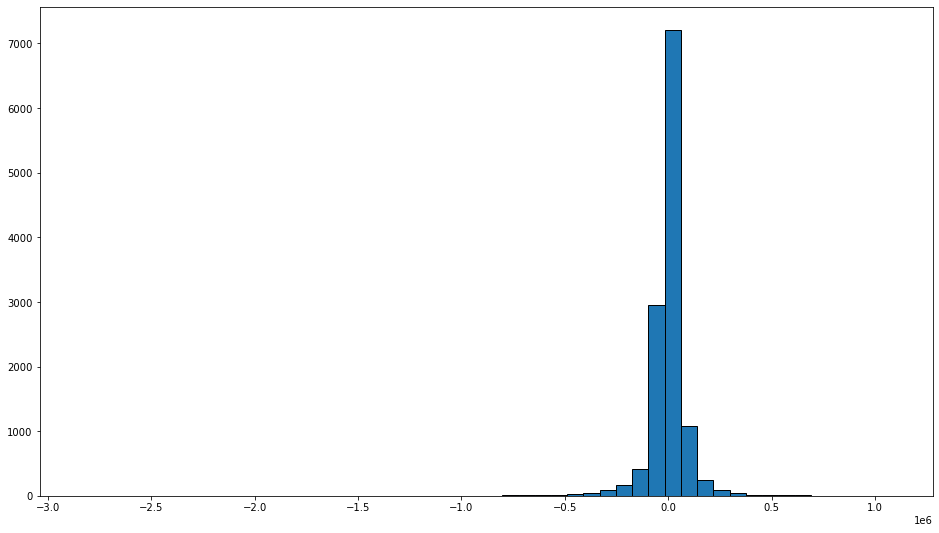

In [15]:
# usando dataset de teste para testar o modelo.
# variáveis independentes (preditoras)
x_test = test.iloc[:, 1:]
y_test = test['Total Household Income'] # variável dependente

# para saber como estão distribuídos os erros,
# podemos criar uma variável subtraindo o valor "real" do dataset teste do valor "previsto", também do dataset teste.
erro = model.predict(x2_test) - y_test

# e visualizar num histograma
plt.figure(figsize = (16, 9))
plt.hist(erro, bins = 50, edgecolor = 'black');

# assim podemos perceber que nossos erros estão centrados no zero e, portanto, podemos dizer que há um bom modelo regressivo.